In [115]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.utils import multi_gpu_model
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, AveragePooling2D, ZeroPadding2D
from keras.layers.core import Activation, Flatten
from keras.models import Sequential, load_model
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split, StratifiedKFold

In [116]:
#defind parameter
os.chdir("C:/Users/wutti/number/")

dataset = 120
num_test = 24

batch_size = 20
n_classes = 10
epch = 100

img_size = 28


In [117]:
#load dataset
x_train = []
x_test = []

for category in range(dataset):
        try:
            name = 'train/number ('+str(category)+').jpg'
            img_array = cv2.imread(name)/255.0
            new_array = cv2.resize(img_array, (img_size, img_size))
            x_train.append(new_array)
        except Exception as e:
            pass

for category in range(num_test):
        try:
            name = 'test/number ('+str(category)+').jpg'
            img_array = cv2.imread(name)/255.0 # cv2.IMREAD_GRAYSCALE
            new_array = cv2.resize(img_array, (img_size, img_size))
            x_test.append(new_array)
        except Exception as e:
            pass

X_train = np.asarray(x_train).astype('float32')
y_train = ((np.arange(dataset) % 10) / 1.0).astype('float32')
X_test = np.asarray(x_test).astype('float32')
y_test = (np.array([2, 9, 5, 7, 2, 3, 7, 4, 0, 9, 8, 5, 5, 0, 8, 7, 2, 4, 3, 5, 3, 2, 7, 3]))



In [122]:
#model
model = Sequential()

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 3)))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(filters=512, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(n_classes, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#train
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='auto')
callbacks_list = [checkpoint]

model.fit(X_train, y_train, epochs=int(epch), batch_size=batch_size, 
            verbose=1, validation_data=(X_test, y_test), callbacks=callbacks_list)

model.load_weights("weights.best.hdf5")
model.save('model_number.model')
print("Finished")

Train on 120 samples, validate on 24 samples
Epoch 1/100
120/120 [==============================] - 8s 66ms/step - loss: 2.4964 - acc: 0.0750 - val_loss: 2.2923 - val_acc: 0.1667

Epoch 00001: val_acc improved from -inf to 0.16667, saving model to weights.best.hdf5
Epoch 2/100
120/120 [==============================] - 2s 20ms/step - loss: 2.3106 - acc: 0.1083 - val_loss: 2.3011 - val_acc: 0.0833

Epoch 00002: val_acc did not improve from 0.16667
Epoch 3/100
120/120 [==============================] - 2s 20ms/step - loss: 2.3063 - acc: 0.0667 - val_loss: 2.3008 - val_acc: 0.1667

Epoch 00003: val_acc improved from 0.16667 to 0.16667, saving model to weights.best.hdf5
Epoch 4/100
120/120 [==============================] - 2s 20ms/step - loss: 2.3010 - acc: 0.1333 - val_loss: 2.2994 - val_acc: 0.1250

Epoch 00004: val_acc did not improve from 0.16667
Epoch 5/100
120/120 [==============================] - 2s 20ms/step - loss: 2.2959 - acc: 0.1250 - val_loss: 2.2830 - val_acc: 0.0833

Epoch

120/120 [==============================] - 3s 22ms/step - loss: 0.0013 - acc: 1.0000 - val_loss: 2.0622 - val_acc: 0.7083

Epoch 00043: val_acc did not improve from 0.79167
Epoch 44/100
120/120 [==============================] - 3s 21ms/step - loss: 0.0249 - acc: 0.9917 - val_loss: 2.4661 - val_acc: 0.7083

Epoch 00044: val_acc did not improve from 0.79167
Epoch 45/100
120/120 [==============================] - 3s 22ms/step - loss: 0.0595 - acc: 0.9750 - val_loss: 2.6496 - val_acc: 0.6667

Epoch 00045: val_acc did not improve from 0.79167
Epoch 46/100
120/120 [==============================] - 2s 21ms/step - loss: 0.0626 - acc: 0.9833 - val_loss: 3.6373 - val_acc: 0.6250

Epoch 00046: val_acc did not improve from 0.79167
Epoch 47/100
120/120 [==============================] - 2s 20ms/step - loss: 0.1331 - acc: 0.9667 - val_loss: 2.1807 - val_acc: 0.6667

Epoch 00047: val_acc did not improve from 0.79167
Epoch 48/100
120/120 [==============================] - 2s 21ms/step - loss: 0.3042

120/120 [==============================] - 5s 39ms/step - loss: 3.7994e-04 - acc: 1.0000 - val_loss: 2.0587 - val_acc: 0.7500

Epoch 00087: val_acc did not improve from 0.79167
Epoch 88/100
120/120 [==============================] - 5s 38ms/step - loss: 0.0405 - acc: 0.9917 - val_loss: 2.0406 - val_acc: 0.7500

Epoch 00088: val_acc did not improve from 0.79167
Epoch 89/100
120/120 [==============================] - 5s 42ms/step - loss: 0.0800 - acc: 0.9833 - val_loss: 1.7475 - val_acc: 0.7500

Epoch 00089: val_acc did not improve from 0.79167
Epoch 90/100
120/120 [==============================] - 5s 38ms/step - loss: 0.0097 - acc: 0.9917 - val_loss: 1.9644 - val_acc: 0.6667

Epoch 00090: val_acc did not improve from 0.79167
Epoch 91/100
120/120 [==============================] - 5s 38ms/step - loss: 0.0120 - acc: 1.0000 - val_loss: 2.0988 - val_acc: 0.6667

Epoch 00091: val_acc did not improve from 0.79167
Epoch 92/100
120/120 [==============================] - 5s 40ms/step - loss: 0.

In [120]:
#test model
new_model = load_model('model_number.model')
predictions = new_model.predict(X_test)
result = np.argmax(predictions, axis=1)
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test_accuracy: %0.2f' % (scores[1]*100), '%')
print("Predicted", result)

24/24 [==============================] - 0s 2ms/step
Test_accuracy: 83.33 %
Predicted [2 9 5 7 2 6 7 4 0 5 8 5 8 0 8 7 2 4 3 5 3 8 7 3]


Predicted : [6]


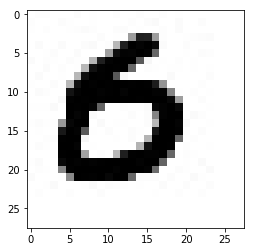

In [69]:
#test one picture
one_model = load_model('model_number.model')

one_name = 'test/number (25).jpg'
one_img = cv2.imread(one_name)/255.0 
one_array = cv2.resize(one_img, (img_size, img_size))
x_test1 = np.asarray(one_array).astype('float32')
X_test1 = x_test1.reshape((1,28,28,3))
one_predict = one_model.predict(X_test1)
one_result = np.argmax(one_predict, axis=1)
print("Predicted :", one_result)
plt.imshow(one_img)
plt.show()


In [102]:
for (fold, val_idx) in enumerate(folds):
    #print("A", trin_idx)
    #print("B", val_idx)
    #print("train idx", val_idx[0])
    #print("test idx", val_idx[1])
    train_idx = val_idx[0]
    test_idx = val_idx[1]
    print("AA", X_train[train_idx].shape)
    print("BB", y_train[train_idx].shape)

AA (60, 28, 28, 3)
BB (60,)
AA (70, 28, 28, 3)
BB (70,)
AA (70, 28, 28, 3)
BB (70,)
AA (70, 28, 28, 3)
BB (70,)
